In [1]:
import sys
sys.path.append("..")

from src.jump_diffusion import MertonBenchmark
from src.utils import plot_regimes_over_price, scatter_mean_variance
from src.constants import CLUSTER_PALETTE
CLUSTER_PALETTE[1], CLUSTER_PALETTE[2] = CLUSTER_PALETTE[2], CLUSTER_PALETTE[1]

In [2]:
mb = MertonBenchmark(
    n_runs=50,
    random_state=42,
    algorithm_windows={"Wasserstein": (72, 12), "Moment": (360, 6)}
)
result, details, stats = mb.run(return_details=True)
result

,Total,Regime-on,Regime-off,Runtime
Algorithm,,,,
Wasserstein,94.14% ± 4.89%,90.20% ± 7.15%,95.48% ± 5.35%,0.74s ± 0.06s
Moment,79.43% ± 1.17%,19.84% ± 4.41%,99.63% ± 0.11%,0.15s ± 0.00s
HMM,65.25% ± 6.96%,39.40% ± 7.49%,74.31% ± 9.07%,0.25s ± 0.00s


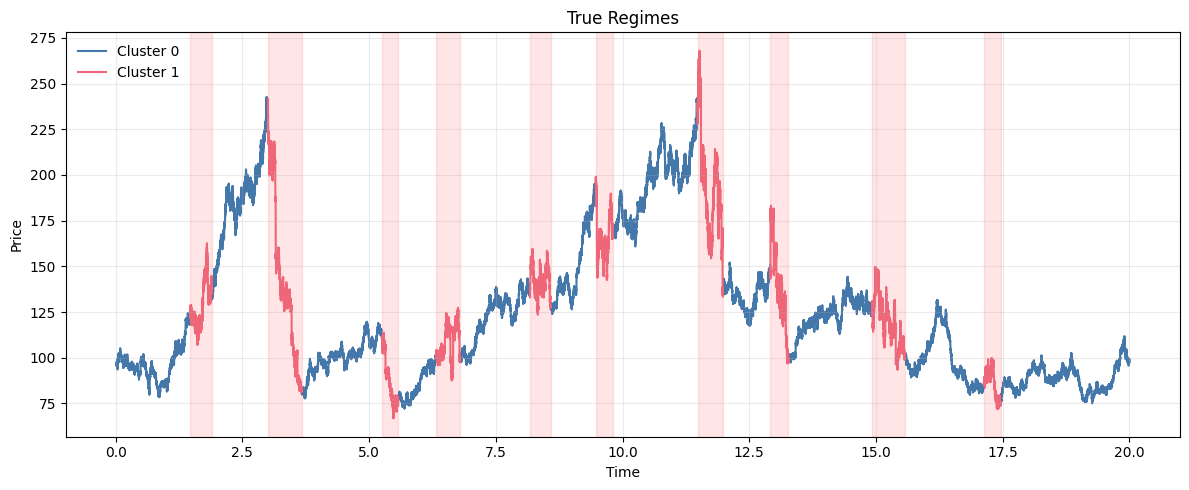

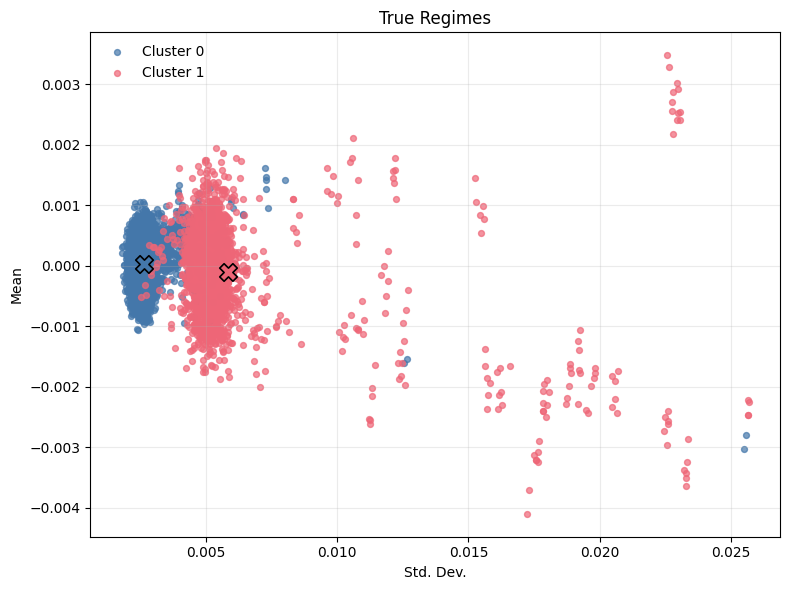

In [3]:
idx = 20
rec = details[idx]
plot_regimes_over_price(rec["prices"], rec["truth"], highlight_clusters=[1], title="True Regimes")
scatter_mean_variance(rec["segments"]["Truth"], rec["truth"], title="True Regimes")

Wasserstein K-Means statistics: total=98.97%, on=97.60%, off=99.36%, runtime=1.016s


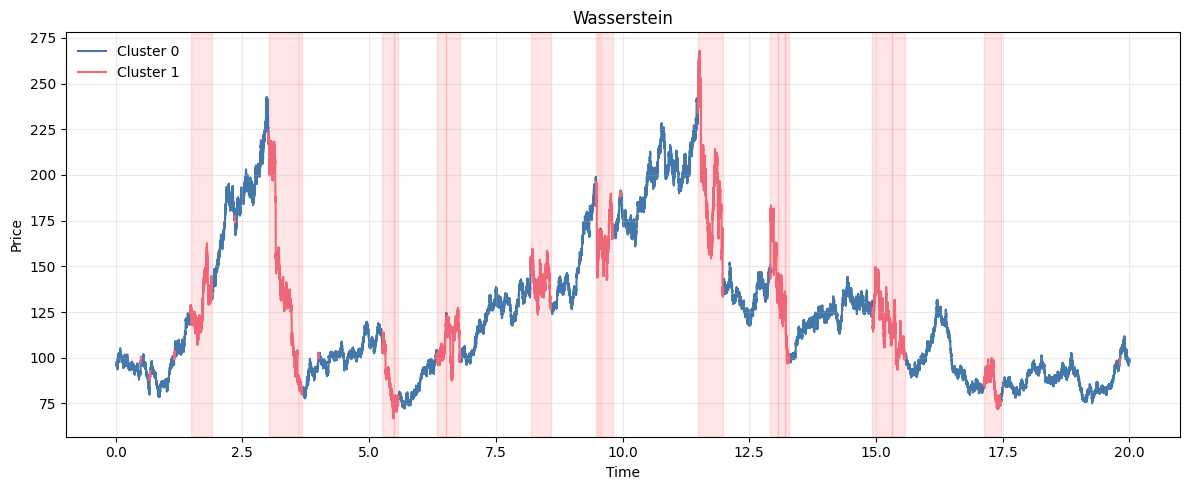

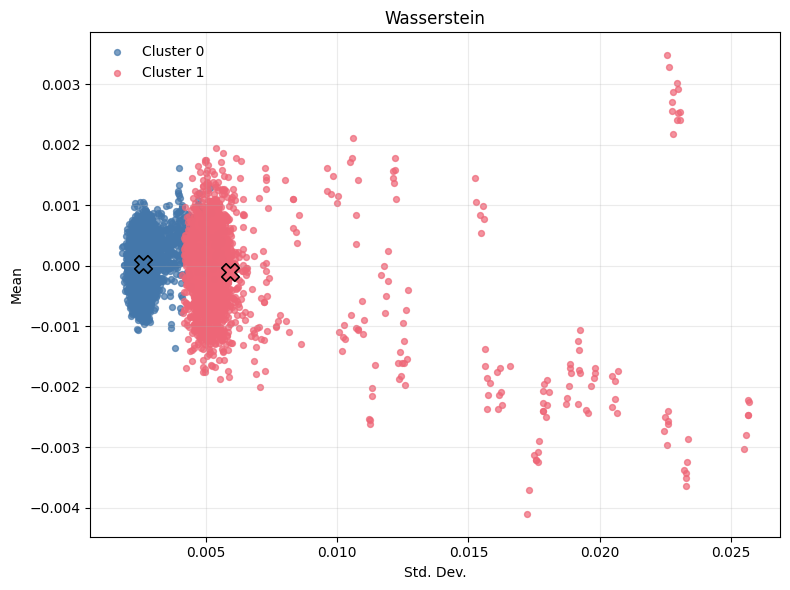

In [4]:
print("Wasserstein K-Means statistics:", stats["Wasserstein"][idx])
plot_regimes_over_price(rec["prices"], rec["predictions"]["Wasserstein"], title="Wasserstein", highlight_clusters=[1], highlight_min_width=100)
scatter_mean_variance(rec["segments"]["Wasserstein"], rec["predictions"]["Wasserstein"], title="Wasserstein")

Moment K-Means statistics: total=81.45%, on=18.38%, off=99.62%, runtime=0.142s


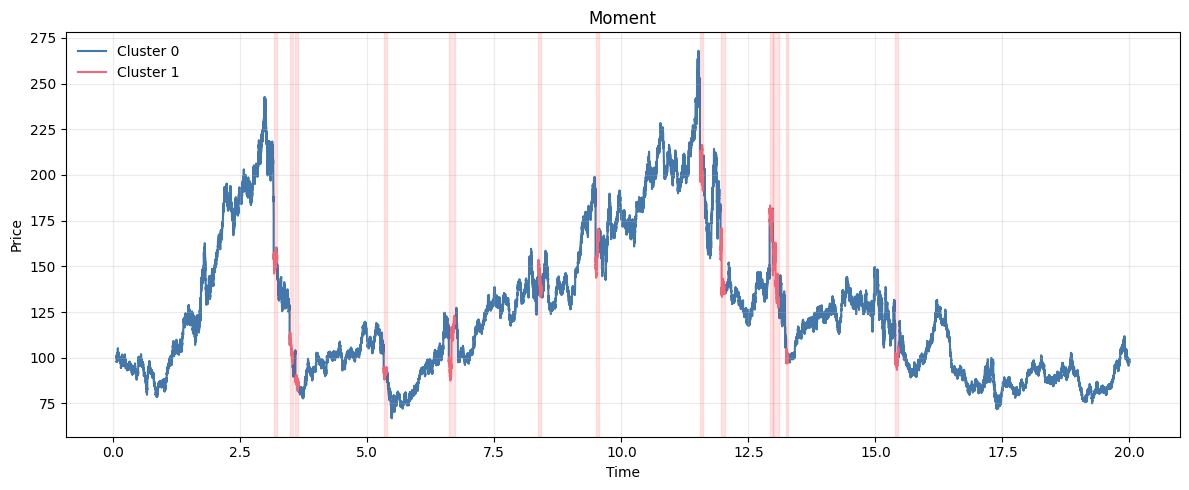

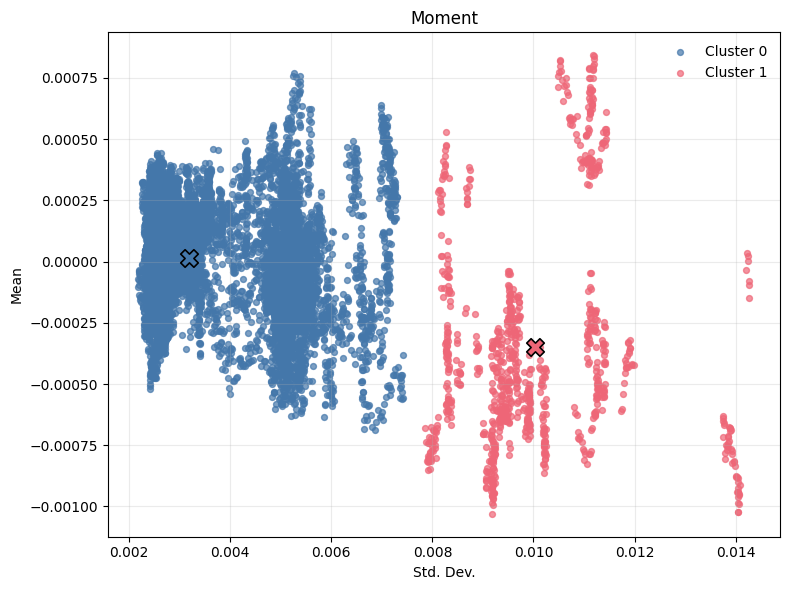

In [5]:
print("Moment K-Means statistics:", stats["Moment"][idx])
plot_regimes_over_price(rec["prices"], rec["predictions"]["Moment"], highlight_clusters=[1], title="Moment")
scatter_mean_variance(rec["segments"]["Moment"], rec["predictions"]["Moment"], title="Moment")

HMM Clustering statistics: total=85.60%, on=37.69%, off=99.35%, runtime=0.257s


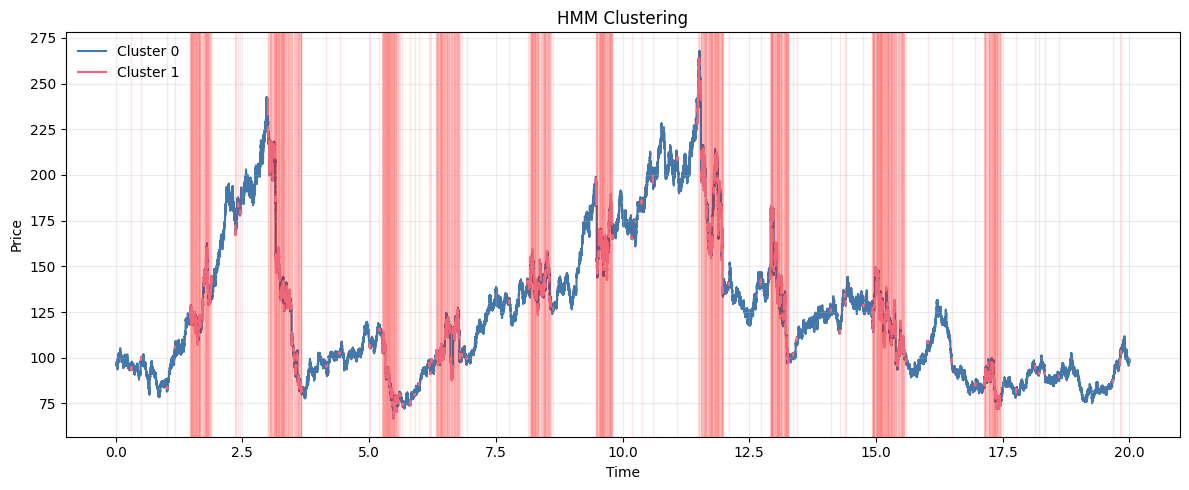

In [9]:
print("HMM Clustering statistics:", stats["HMM"][idx])
plot_regimes_over_price(rec["prices"], rec["predictions"]["HMM"], highlight_clusters=[1], title="HMM Clustering", highlight_min_width=10)